In [1]:
import numpy as np
import matplotlib.pyplot as plt
import galois

In [23]:
def circulant_matrix(row, k, open=True):
    return np.array([np.roll(row, i) for i in range(len(row)-k)])

def pcm(n, k):
    seed = np.zeros(n, dtype=int)
    seed[0] = seed[1] = seed[k] = 1
    return circulant_matrix(seed, k)

def circulant_matrix_seeded(n, k, coeff):
    if max(coeff) > n: return
    seed = np.zeros(n, dtype=int)
    seed[coeff] = 1
    return np.array([np.roll(seed, i) for i in range(len(seed)-k)])

H = pcm(22,4)
# coeffs = [0,1,5]
# H = circulant_matrix_seeded(12, 4, coeffs)
m, n = H.shape
print(H.shape)
H

(18, 22)


array([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [41]:
H = np.array(H)
Hx = np.hstack([np.kron(H, np.eye(H.shape[1], dtype=int)), np.kron(np.eye(H.shape[0], dtype=int), H.T)])
Hz = np.hstack([np.kron(np.eye(H.shape[1], dtype=int), H), np.kron(H.T, np.eye(H.shape[0], dtype=int))])
cm, cn = Hx.shape

(8, 20)


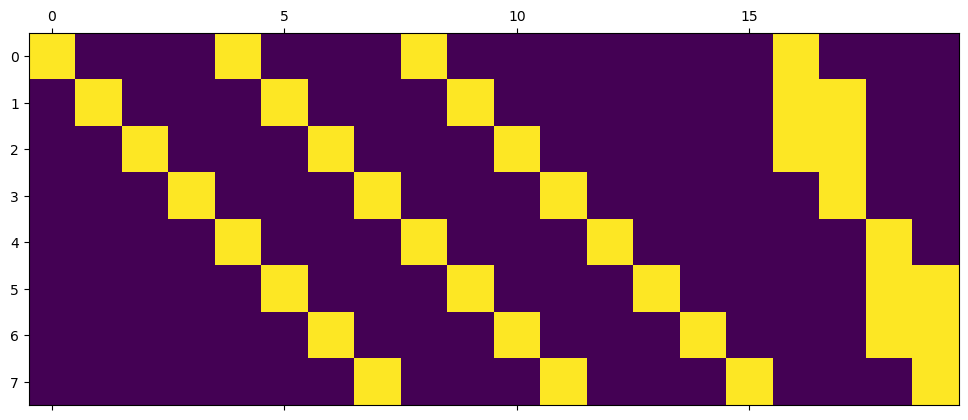

In [42]:
plt.matshow(Hx)
print(Hx.shape)

In [43]:
latticeL = np.arange(n**2).reshape(n,n)
latticeR = np.arange(n**2, cn).reshape(m,m)
latticeZ = np.arange(cn, cn+cm).reshape(m,n)
latticeX = np.arange(cn+cm, cn+cm+cm).reshape(n,m)

In [44]:
tmp1 = np.zeros((n, n+m), dtype=int)
for i in range(2*m):
    tmp1[:,i] = latticeL[:, i//2] if (i % 2 == 0) else latticeX[:, i//2]
if (m < n):
    tmp1[:, 2*m:] = latticeL[:, m:]

tmp2 = np.zeros((m, n+m), dtype=int)
for i in range(2*m):
    tmp2[:,i] = latticeZ[:, i//2] if (i % 2 == 0) else latticeR[:, i//2]
if (m < n):
    tmp2[:, 2*m:] = latticeZ[:, m:]

lattice = np.zeros((m+n, m+n), dtype=int)
for i in range(2*m):
    lattice[i] = tmp1[i//2] if (i % 2 == 0) else tmp2[i//2]
if (m < n):
    lattice[2*m:] = tmp1[m:]

In [45]:
tmp1

array([[ 0, 28,  1, 29,  2,  3],
       [ 4, 30,  5, 31,  6,  7],
       [ 8, 32,  9, 33, 10, 11],
       [12, 34, 13, 35, 14, 15]])

In [46]:
tmp2

array([[20, 16, 21, 17, 22, 23],
       [24, 18, 25, 19, 26, 27]])

In [47]:
lattice+1

array([[ 1, 29,  2, 30,  3,  4],
       [21, 17, 22, 18, 23, 24],
       [ 5, 31,  6, 32,  7,  8],
       [25, 19, 26, 20, 27, 28],
       [ 9, 33, 10, 34, 11, 12],
       [13, 35, 14, 36, 15, 16]])

In [51]:
[x+1 for x in np.where(Hx[0])[0]]

[1, 5, 9, 17]

In [53]:
[x+1 for x in np.where(Hz[1])[0]]

[2, 3, 4, 18]

In [38]:
Hz.shape[0]

8

In [39]:
Hx.shape

(8, 20)